In [6]:
import tensorflow as tf
tf.test.is_built_with_cuda()
tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None)

True

In [7]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
!mkdir ~/.kaggle
!mv /content/kaggle.json ~/.kaggle/kaggle.json


mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [9]:
!chmod 600 ~/.kaggle/kaggle.json


In [10]:
%%time
!kaggle competitions download -c dogs-vs-cats


100% 812M/812M [00:03<00:00, 255MB/s]
100% 812M/812M [00:03<00:00, 214MB/s]
CPU times: user 67.4 ms, sys: 15.5 ms, total: 82.9 ms
Wall time: 4.65 s


In [11]:
import zipfile

# Specify the path of the downloaded zip file
zip_file_path = "/content/dogs-vs-cats.zip"  # Replace with the actual path of your downloaded zip file

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall("/content")  # Specify the path where you want to extract the files


In [14]:
!unzip -qq train.zip

In [16]:
!unzip -qq test1.zip

In [17]:
%%time
import os
import shutil

# Specify the paths of the train and test1 folders
train_folder_path = "/content/train"  # Replace with the actual path of your train folder
test1_folder_path = "/content/test1"  # Replace with the actual path of your test1 folder

# Specify the path of the destination folder where you want to merge the images
destination_folder_path = "/content/dog_cat1"

# Create the destination folder if it doesn't exist
if not os.path.exists(destination_folder_path):
    os.makedirs(destination_folder_path)

# Function to merge images from a source folder to the destination folder
def merge_images(source_folder, destination_folder):
    file_names = os.listdir(source_folder)
    for file_name in file_names:
        source_file_path = os.path.join(source_folder, file_name)
        destination_file_path = os.path.join(destination_folder, file_name)
        shutil.copy(source_file_path, destination_file_path)

# Merge images from the train folder
merge_images(train_folder_path, destination_folder_path)

# Merge images from the test1 folder
merge_images(test1_folder_path, destination_folder_path)


CPU times: user 1.48 s, sys: 3.02 s, total: 4.5 s
Wall time: 7.86 s


In [18]:
l = os.listdir("/content/dog_cat1")
print(len(l))

37500


In [24]:
import os, shutil
original_dataset_dir = '/content/train'
base_dir = './dog_cat3/abc'
os.mkdir(base_dir)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [25]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

print('total training dog images:', len(os.listdir(train_dogs_dir)))

print('total validation cat images:', len(os.listdir(validation_cats_dir)))

print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

print('total test cat images:', len(os.listdir(test_cats_dir)))

print('total test dog images:', len(os.listdir(test_dogs_dir)))


total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


# Listing 5.5 Instantiating a small convnet for dogs vs. cats classification

In [26]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

## Listing 5.6 Configuring the model for training

In [28]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# Listing 5.7 Using ImageDataGenerator to read images from directories

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Listing 5.8 Fitting the model using a batch generator

In [30]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30


<ipython-input-30-76dc69394845>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 22s 106ms/step - loss: 0.7276 - acc: 0.5070 - val_loss: 0.6927 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 10s 104ms/step - loss: 0.6938 - acc: 0.5380 - val_loss: 0.6878 - val_acc: 0.6090
Epoch 3/30
100/100 [==============================] - 11s 115ms/step - loss: 0.6830 - acc: 0.5815 - val_loss: 0.7103 - val_acc: 0.5600
Epoch 4/30
100/100 [==============================] - 9s 95ms/step - loss: 0.6302 - acc: 0.6615 - val_loss: 0.6488 - val_acc: 0.6130
Epoch 5/30
100/100 [==============================] - 10s 101ms/step - loss: 0.5916 - acc: 0.6850 - val_loss: 0.6388 - val_acc: 0.6120
Epoch 6/30
100/100 [==============================] - 10s 102ms/step - loss: 0.5548 - acc: 0.7100 - val_loss: 0.5589 - val_acc: 0.7130
Epoch 7/30
100/100 [==============================] - 10s 102ms/step - loss: 0.5190 - acc: 0.7515 - val_loss: 0.6777 - val_acc: 0.6770
Epoch 8/30
100/100 [==============================] - 10s 101ms/step

# Listing 5.9 Saving the model

In [31]:
model.save('cats_and_dogs_small_1.h5')

# Listing 5.10 Displaying curves of loss and accuracy during training

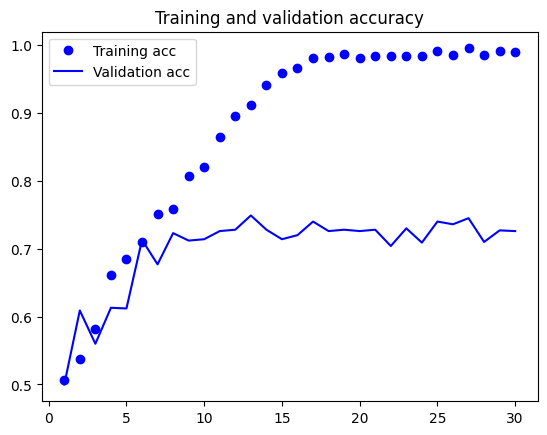

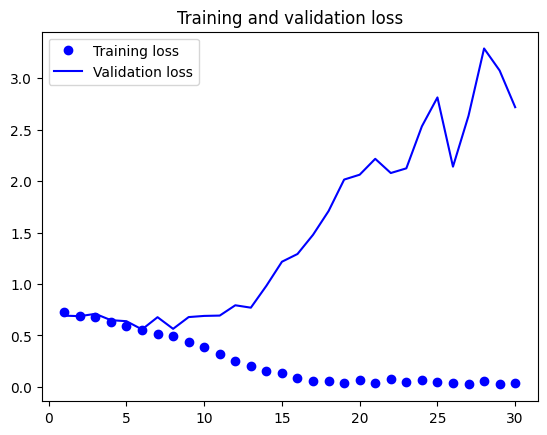

In [32]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Listing 5.11 Setting up a data augmentation configuration via ImageDataGenerator

In [33]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

## Listing 5.12 Displaying some randomly augmented training images

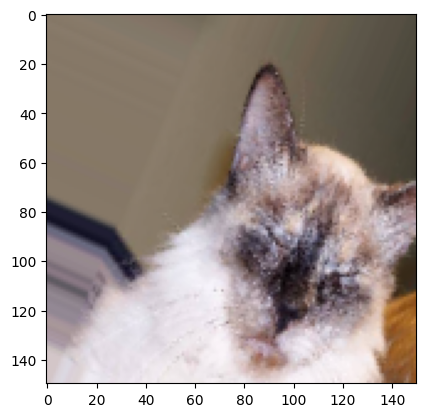

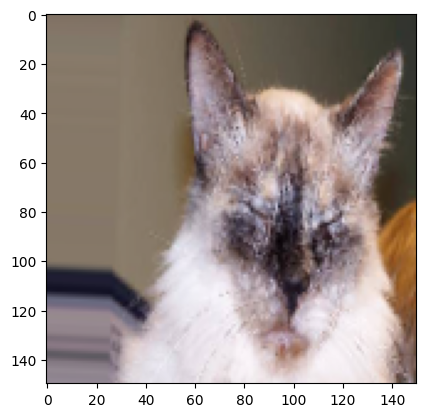

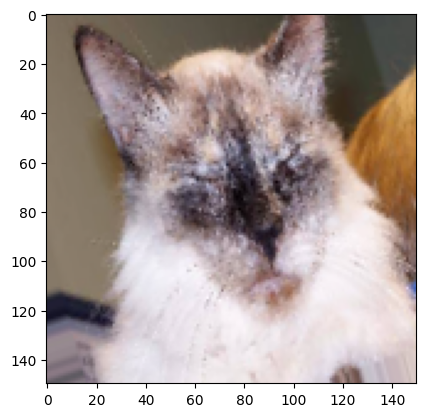

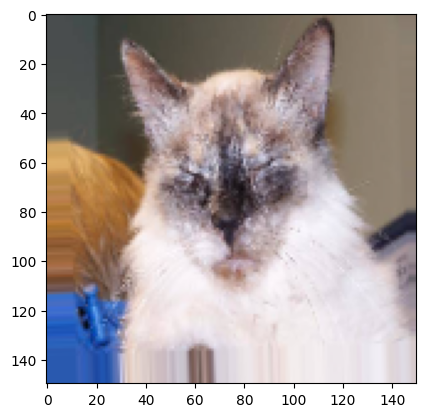

In [34]:
from tensorflow.keras.preprocessing import image
fnames = [os.path.join(train_cats_dir, fname) for
          fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))


x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

## Listing 5.13 Defining a new convnet that includes dropout

In [35]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

## Listing 5.14 Training the convnet using data-augmentation generators

In [39]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100


<ipython-input-39-e4536089f4bd>:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 19s 188ms/step - loss: 0.6869 - acc: 0.5530 - val_loss: 0.7230 - val_acc: 0.5160
Epoch 2/100
100/100 [==============================] - 20s 196ms/step - loss: 0.6713 - acc: 0.5990 - val_loss: 0.6637 - val_acc: 0.5740
Epoch 3/100
100/100 [==============================] - 19s 187ms/step - loss: 0.6514 - acc: 0.6005 - val_loss: 0.6458 - val_acc: 0.6100
Epoch 4/100
100/100 [==============================] - 20s 198ms/step - loss: 0.6580 - acc: 0.6100 - val_loss: 0.6355 - val_acc: 0.6250
Epoch 5/100
100/100 [==============================] - 19s 189ms/step - loss: 0.6464 - acc: 0.6135 - val_loss: 0.6303 - val_acc: 0.6380
Epoch 6/100
100/100 [==============================] - 20s 198ms/step - loss: 0.6285 - acc: 0.6390 - val_loss: 0.6046 - val_acc: 0.6560
Epoch 7/100
100/100 [==============================] - 21s 210ms/step - loss: 0.6213 - acc: 0.6550 - val_loss: 0.6677 - val_acc: 0.6100
Epoch 8/100
100/100 [==============================] - 19s 1

## Listing 5.15 Saving the model

In [40]:
model.save('cats_and_dogs_small_2.h5')

# **VGG16**

In [41]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150,150,3))

58889256/58889256 [==============================] - 0s 0us/step


In [42]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

# Listing 5.17 Extracting features using the pretrained convolutional base

In [43]:
config = tf.compat.v1.ConfigProto()

config.gpu_options.allow_growth=True

sess = tf.compat.v1.Session(config=config)

In [44]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.debugging.set_log_device_placement(True)

Num GPUs Available:  1


In [45]:
import tensorflow as tf
config = tf.compat.v1.ConfigProto()
sess = tf.compat.v1.Session(config=config)

In [46]:
tf.config.experimental.set_memory_growth = True
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
base_dir = './dog_cat3/abc'


train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)


Found 2000 images belonging to 2 classes.
1/1 [==============================] - 0s 23ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 0s 27ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 0s 23ms/step


In [47]:
train_features = np.reshape(train_features, (2000, 4*4* 512))
validation_features = np.reshape(validation_features, (1000, 4*4* 512))
test_features = np.reshape(test_features, (1000, 4*4* 512))

#Listing 5.18 Defining and training the densely connected classifier

In [48]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
    loss='binary_crossentropy',
    metrics=['acc'])
history = model.fit(train_features, train_labels,
epochs=30,
batch_size=20,
validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 1s 6ms/step - loss: 0.6992 - acc: 0.7580 - val_loss: 0.2769 - val_acc: 0.8860
Epoch 2/30
100/100 [==============================] - 0s 4ms/step - loss: 0.3608 - acc: 0.8455 - val_loss: 0.3024 - val_acc: 0.8790
Epoch 3/30
100/100 [==============================] - 1s 5ms/step - loss: 0.2817 - acc: 0.8830 - val_loss: 0.3111 - val_acc: 0.8650
Epoch 4/30
100/100 [==============================] - 1s 5ms/step - loss: 0.2387 - acc: 0.9045 - val_loss: 0.3490 - val_acc: 0.8690
Epoch 5/30
100/100 [==============================] - 1s 5ms/step - loss: 0.2103 - acc: 0.9220 - val_loss: 0.2679 - val_acc: 0.8980
Epoch 6/30
100/100 [==============================] - 1s 5ms/step - loss: 0.1775 - acc: 0.9310 - val_loss: 0.2755 - val_acc: 0.8990
Epoch 7/30
100/100 [==============================] - 1s 5ms/step - loss: 0.1623 - acc: 0.9380 - val_loss: 0.4093 - val_acc: 0.8540
Epoch 8/30
100/100 [==============================] - 0s 4ms/step - loss: 0.